In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adamax
import keras

%matplotlib inline

In [4]:
df = pd.read_csv('main_dataset.csv')
df_c = pd.read_csv('unique_tracks.csv')
df['user_id'] = df['user_id'].astype(str)

In [5]:
df.columns ,df_c.columns

(Index(['user_id', ' "artistname"', ' "trackname"', ' "playlistname"',
        'trackID', 'view'],
       dtype='object'),
 Index(['user_id', 'artist', 'track', 'trackID'], dtype='object'))

In [6]:
users_items_matrix_df = df.pivot_table(
    index='user_id', 
    columns='trackID', 
    values='view',
    aggfunc='sum'
).fillna(0)

users_items_matrix_df.head(10)

trackID,1,2,3,4,5,6,7,8,9,10,...,35982,35983,35984,35985,35986,35987,35988,35989,35990,35991
user_id,,,,,,,,,,,,,,,,,,,,,
07f0fc3be95dcd878966b1f9572ff670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0dd94f9c32d7306d1d16d7e1d62fc7dc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107a0f48c40ed4dc29f758f063df463a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123122ce28f91ca1cb208d73abde5405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17264e82e1a930acf92390050ebdb07a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1c281ea1afd3f85871c43a0ef14890f3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1ed9910b0db7fcb779ec65b2ded4892f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23a17802002bcd5ce26954efcbed2676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29320fd2d36575b40d21b623adcf12b2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
users_items_matrix_df.shape

(54, 35991)

In [8]:
x = users_items_matrix_df.values
x.shape

(54, 35991)

In [185]:
model = Sequential([
    Dense(units=512, activation='selu', name='enc_1', input_dim=users_items_matrix_df.shape[1]),
    Dense(units=256, activation='selu', name='embeddings'),
    #Dropout(rate=0.5, name='dropout'),
    Dense(units=512, activation='selu', name='dec_1'),
    Dense(units=users_items_matrix_df.shape[1], activation='linear', name='user_score_pred')
])
model.summary()

model.compile(optimizer=Adam(lr=1e-3), loss='mse')

hist = model.fit(x, x, epochs=50, batch_size=64, shuffle=True, validation_split=0.1)

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 enc_1 (Dense)               (None, 512)               18427904  
                                                                 
 embeddings (Dense)          (None, 256)               131328    
                                                                 
 dec_1 (Dense)               (None, 512)               131584    
                                                                 
 user_score_pred (Dense)     (None, 35991)             18463383  
                                                                 
Total params: 37,154,199
Trainable params: 37,154,199
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.0412 - val_loss: 0.0114
Epoch 2/50
1/1 [==============================] - 0s 322ms/step - loss: 0.0614

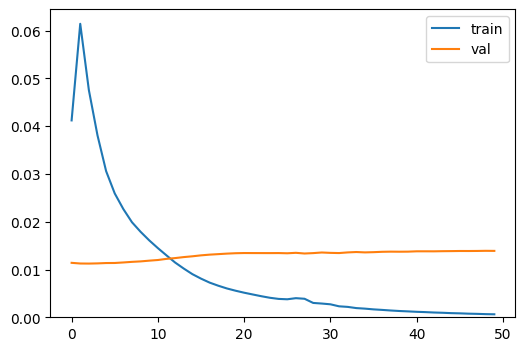

In [186]:
plt.figure(figsize=(6, 4))
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.ylim(0)
plt.legend()

In [187]:
new_matrix = model.predict(x) * (x == 0)

2/2 [==============================] - 0s 30ms/step


In [188]:
new_users_items_matrix_df = pd.DataFrame(
    new_matrix,
    columns=users_items_matrix_df.columns,
    index=users_items_matrix_df.index
)
new_users_items_matrix_df.head()

trackID,1,2,3,4,5,6,7,8,9,10,...,35982,35983,35984,35985,35986,35987,35988,35989,35990,35991
user_id,,,,,,,,,,,,,,,,,,,,,
07f0fc3be95dcd878966b1f9572ff670,-0.008515,0.015284,0.004693,-0.017471,0.009615,0.004412,-0.009421,0.007069,-0.008698,0.022272,...,0.013030,-0.016529,0.028117,-0.003161,-0.007586,0.014399,0.021484,0.022013,0.011406,0.001143
0dd94f9c32d7306d1d16d7e1d62fc7dc,-0.004982,-0.001045,0.005404,-0.003798,0.009289,-0.004468,-0.006966,-0.004685,-0.004861,0.008887,...,-0.006411,0.002400,0.004713,-0.009564,0.003017,0.008839,0.004410,0.006549,-0.010616,0.005169
107a0f48c40ed4dc29f758f063df463a,0.021858,0.024749,0.029443,0.021255,0.019176,0.029419,0.021636,0.014318,0.021807,0.026067,...,0.002369,0.000997,-0.004018,0.004635,-0.001503,-0.002753,0.000610,0.003444,0.000945,0.001806
123122ce28f91ca1cb208d73abde5405,-0.001172,0.000395,-0.003007,-0.020272,0.038041,0.007002,0.006701,-0.009719,0.007991,-0.011995,...,0.007983,0.010884,-0.008892,0.015239,-0.012942,-0.004921,-0.017820,-0.001352,-0.005624,-0.011330
17264e82e1a930acf92390050ebdb07a,-0.023399,0.009166,0.002044,0.003838,0.001156,-0.018966,0.010040,0.052259,-0.010845,0.015148,...,0.013346,0.014504,0.003216,0.017958,0.006269,0.003177,0.007047,0.027787,-0.005757,0.002404


In [203]:
def recommender_for_user(user_id, interact_matrix, df_content, topn = 10):
    pred_scores = interact_matrix.loc[user_id].values

    df_scores = pd.DataFrame({
        'trackID': list(users_items_matrix_df.columns), 
        'score': pred_scores
    })

    df_rec = (df_scores
        .set_index('trackID')
        .join(df_content.set_index('trackID'))
        .sort_values('score', ascending=False)
        .head(topn)[['score','track', 'artist']]
    )

    return df_rec[df_rec.score > 0]

In [208]:
recommender_for_user(user_id='7429488f7c8927077b9fd9f03fee8f15', interact_matrix=users_items_matrix_df, df_content=df_c)

,score,track,artist
trackID,,,
18062,2.0,Who's Gonna Save Us,Gavin DeGraw
18059,2.0,Leading Man,Gavin DeGraw
18061,2.0,Need,Gavin DeGraw
14880,2.0,All of Me,John Legend
18058,2.0,I'm Gonna Try,Gavin DeGraw
18057,2.0,Heartbreak,Gavin DeGraw
18056,2.0,Finest Hour,Gavin DeGraw
10650,2.0,Best I Ever Had,Gavin DeGraw
18055,2.0,Everything Will Change,Gavin DeGraw


In [209]:
recommender_for_user(user_id='7429488f7c8927077b9fd9f03fee8f15', interact_matrix=new_users_items_matrix_df, df_content=df_c)

,score,track,artist
trackID,,,
8585,0.083034,These Days,Nico
5056,0.068149,Ho Hey,The Lumineers
19332,0.062690,What I've Done,Linkin Park
7356,0.061018,Royals,Paper Route
1074,0.059368,My Favourite Game,The Cardigans
658,0.058140,No One Knows,Queens Of The Stone Age
904,0.056314,Closer,Nine Inch Nails
4844,0.055726,Hallelujah,Jeff Buckley
12229,0.054329,BlueNote-Breaks2-07 The Caterpillar [Lou Donal...,Blue Note Records
